<a href="https://colab.research.google.com/github/karthikmandelli/Coursera-HTML-CSS-and-JavaScript-for-Web-Developers/blob/master/DAY_5_temperature_prediciton_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11141 non-null  object 
 1   LWP     11141 non-null  int64  
 2   WS      11141 non-null  float64
 3   WD      11141 non-null  object 
 4   RF      11141 non-null  float64
 5   LUX     11141 non-null  float64
 6   AirTC   11141 non-null  float64
 7   AirHP   11141 non-null  float64
 8   AirPP   11141 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 783.5+ KB


In [6]:
data.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

In [7]:
data.head()

,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP
0,"5/19/2023, 11:56:57 PM",1,8.64,s,0.0,0.0,29.52,81.51,1003.79
1,"5/19/2023, 11:39:50 PM",1,5.28,s,0.0,0.0,29.80,81.27,1003.99
2,"5/19/2023, 11:22:43 PM",1,7.20,wsw,0.0,0.0,29.87,82.06,1003.95
3,"5/19/2023, 11:05:34 PM",1,10.08,s,0.0,0.0,29.91,83.69,1003.93
4,"5/19/2023, 10:48:27 PM",1,3.36,s,0.0,0.0,29.84,84.67,1003.82


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime, timedelta

In [9]:
# Assuming you have a 'date' column and a 'temperature' column in your dataset
data['Date'] = pd.to_datetime(data['Date'])
data['AirTC'] = pd.to_numeric(data['AirTC'])


In [10]:
data['AirPP'] = pd.to_numeric(data['AirPP'])
data['AirHP'] = pd.to_numeric(data['AirHP'])


In [11]:
X = pd.to_datetime(data['Date']).values.reshape(-1, 1)
y = data['AirTC'].values.reshape(-1, 1)

In [12]:
# Additional Feature Engineering (example: extracting month and day of the week)
data['month'] = data['Date'].dt.month
data['day_of_week'] = data['Date'].dt.dayofweek

X = data[['month', 'day_of_week']].values
y = data['AirTC'].values


In [13]:
X = data[['AirPP', 'AirHP']].values
y = data['AirTC'].values

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print(y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

[34.9466 29.8326 26.2288 ... 28.379  31.687  30.7116]
Mean Squared Error: 3.370004529192966


In [16]:
# Step 4: Generate Dates for Next 15 Days
last_date = data['Date'].max()
next_15_days = [last_date + timedelta(minutes=i)  for i in range(60,80)  for _ in range(0,15)]

# Step 5: Predict Temperature for Next 15 Days
X_pred = np.array([(date.month, date.dayofweek) for date in next_15_days])
y_pred = model.predict(X_pred)

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'date': next_15_days, 'TEMPC': y_pred})

# Step 7: Print Predictions
print(predictions)

                   date    TEMPC
0   2023-05-20 00:56:57  14.8667
1   2023-05-20 00:56:57  14.8667
2   2023-05-20 00:56:57  14.8667
3   2023-05-20 00:56:57  14.8667
4   2023-05-20 00:56:57  14.8667
..                  ...      ...
295 2023-05-20 01:15:57  14.8667
296 2023-05-20 01:15:57  14.8667
297 2023-05-20 01:15:57  14.8667
298 2023-05-20 01:15:57  14.8667
299 2023-05-20 01:15:57  14.8667

[300 rows x 2 columns]


In [17]:
last_date = data['Date'].max()
next_15_days = [last_date + timedelta(minutes=i)  for i in range(60, 60 * 24 * 15 + 1)]

X_pred = np.array([(date.month, date.dayofweek) for date in next_15_days])

#Step 5: Predict Temperature for Next 15 Days
X_pred = np.repeat(data[['AirPP', 'AirHP']].head(1).values, len(next_15_days), axis=0)
 # Use the last recorded pressure and humidity values
y_pred = model.predict(X_pred)

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'Date': next_15_days, 'TEMPC': y_pred})

# Step 7: Print Predictions
print(predictions)

                     Date    TEMPC
0     2023-05-20 00:56:57  28.8061
1     2023-05-20 00:57:57  28.8061
2     2023-05-20 00:58:57  28.8061
3     2023-05-20 00:59:57  28.8061
4     2023-05-20 01:00:57  28.8061
...                   ...      ...
21536 2023-06-03 23:52:57  28.8061
21537 2023-06-03 23:53:57  28.8061
21538 2023-06-03 23:54:57  28.8061
21539 2023-06-03 23:55:57  28.8061
21540 2023-06-03 23:56:57  28.8061

[21541 rows x 2 columns]


In [18]:
last_date = data['Date'].max()
next_15_days = [last_date + timedelta(days=i)  for i in range(0,15)]
timestamps = pd.date_range(start=next_15_days[0], periods=24*15, freq='60T')

# Step 5: Predict Temperature for Next 15 Days
X_pred = np.repeat(data[['AirPP', 'AirHP']].tail(1).values, len(next_15_days), axis=0)
X_pred[:, 0] = [date.month for date in next_15_days]
X_pred[:, 1] = [date.dayofweek for date in next_15_days]
y_pred = model.predict(X_pred)

# Step 6: Create DataFrame with Predictions
predictions = pd.DataFrame({'date': next_15_days, 'TEMPC': y_pred})
predictions['date'] = predictions['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 7: Print Predictions
print(predictions.to_string())

                   date    TEMPC
0   2023-05-19 23:56:57  14.8667
1   2023-05-20 23:56:57  14.8667
2   2023-05-21 23:56:57  14.8667
3   2023-05-22 23:56:57  14.8667
4   2023-05-23 23:56:57  14.8667
5   2023-05-24 23:56:57  14.8667
6   2023-05-25 23:56:57  14.8667
7   2023-05-26 23:56:57  14.8667
8   2023-05-27 23:56:57  14.8667
9   2023-05-28 23:56:57  14.8667
10  2023-05-29 23:56:57  14.8667
11  2023-05-30 23:56:57  14.8667
12  2023-05-31 23:56:57  14.8667
13  2023-06-01 23:56:57  14.8667
14  2023-06-02 23:56:57  14.8667


In [19]:
y_true = data['AirTC']
y_pred_train = model.predict(X)
r2 = r2_score(y_true, y_pred_train)
print(f"R2 Score: {r2}")

R2 Score: 0.9877283936142249


In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 #Step 3: Calculate average temperature for each hour
hourly_avg_temp = data.groupby('Date')['AirTC'].mean()
# Step 4: Create a pipeline for preprocessing and modeling
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100))

# Step 5: Train the model
pipeline.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 7: Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

# Step 8: Make predictions for the next 15 days
X_pred = np.repeat(data[['AirPP', 'AirHP']].head(1).values, 24*15, axis=0)
y_pred_next = pipeline.predict(X_pred)

# Step 9: Create DataFrame with predictions for the next 15 days
next_15_days = pd.date_range(start=data['Date'].max() + pd.Timedelta(days=1), periods=24*15, freq='60T')
predictions = pd.DataFrame({'datetime': next_15_days, 'temperature': y_pred_next})
print(predictions)


R2 Score: 0.9584029846376071
               datetime  temperature
0   2023-05-20 23:56:57      28.6714
1   2023-05-21 00:56:57      28.6714
2   2023-05-21 01:56:57      28.6714
3   2023-05-21 02:56:57      28.6714
4   2023-05-21 03:56:57      28.6714
..                  ...          ...
355 2023-06-04 18:56:57      28.6714
356 2023-06-04 19:56:57      28.6714
357 2023-06-04 20:56:57      28.6714
358 2023-06-04 21:56:57      28.6714
359 2023-06-04 22:56:57      28.6714

[360 rows x 2 columns]


In [21]:
predictions.head(50)

,datetime,temperature
0,2023-05-20 23:56:57,28.6714
1,2023-05-21 00:56:57,28.6714
2,2023-05-21 01:56:57,28.6714
3,2023-05-21 02:56:57,28.6714
4,2023-05-21 03:56:57,28.6714
5,2023-05-21 04:56:57,28.6714
6,2023-05-21 05:56:57,28.6714
7,2023-05-21 06:56:57,28.6714
8,2023-05-21 07:56:57,28.6714
9,2023-05-21 08:56:57,28.6714


# average temperature for each hour

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Step 2: Data Preprocessing
data['datetime'] = pd.to_datetime(data['Date'])  # Convert datetime column to pandas datetime format
data['hour'] = data['datetime'].dt.hour  # Extract hour from datetime column
data['day'] = data['datetime'].dt.day  # Extract day from datetime column

# Step 3: Calculate average temperature for each hour
hourly_avg_temp = data.groupby('hour')['AirTC'].max()

# Step 4: Generate next 15 days' datetime at hourly intervals
next_30_days = pd.date_range(start=data['datetime'].max(), periods=24*30, freq='60T')

# Step 5: Extract hour and day for the next 15 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
predictions['temperature'] = [hourly_avg_temp[hour]-2.9 for hour in next_hour]

print(predictions)


               datetime  temperature
0   2023-05-19 23:56:57        28.35
1   2023-05-20 00:56:57        27.86
2   2023-05-20 01:56:57        27.56
3   2023-05-20 02:56:57        26.98
4   2023-05-20 03:56:57        26.88
..                  ...          ...
715 2023-06-18 18:56:57        32.40
716 2023-06-18 19:56:57        31.54
717 2023-06-18 20:56:57        29.65
718 2023-06-18 21:56:57        29.45
719 2023-06-18 22:56:57        28.87

[720 rows x 2 columns]


In [23]:
subset_rows = predictions.iloc[471:510]
print(subset_rows)

               datetime  temperature
471 2023-06-08 14:56:57        40.27
472 2023-06-08 15:56:57        40.49
473 2023-06-08 16:56:57        40.73
474 2023-06-08 17:56:57        39.63
475 2023-06-08 18:56:57        32.40
476 2023-06-08 19:56:57        31.54
477 2023-06-08 20:56:57        29.65
478 2023-06-08 21:56:57        29.45
479 2023-06-08 22:56:57        28.87
480 2023-06-08 23:56:57        28.35
481 2023-06-09 00:56:57        27.86
482 2023-06-09 01:56:57        27.56
483 2023-06-09 02:56:57        26.98
484 2023-06-09 03:56:57        26.88
485 2023-06-09 04:56:57        26.62
486 2023-06-09 05:56:57        26.30
487 2023-06-09 06:56:57        27.12
488 2023-06-09 07:56:57        30.90
489 2023-06-09 08:56:57        33.19
490 2023-06-09 09:56:57        34.19
491 2023-06-09 10:56:57        36.05
492 2023-06-09 11:56:57        37.23
493 2023-06-09 12:56:57        37.52
494 2023-06-09 13:56:57        39.37
495 2023-06-09 14:56:57        40.27
496 2023-06-09 15:56:57        40.49
4

In [24]:
import pandas as pd
import numpy as np

data['datetime'] = pd.to_datetime(data['Date'])

# Step 2: Set the start date and time for predictions
start_date = pd.to_datetime('2023-05-22')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')

# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_30_days = pd.date_range(start=start_date + start_time, periods=24 * 30, freq='60T')

# Step 5: Extract hour and day for the next 30 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
#predictions['temperature'] = [data[data['hour'] == hour]['AirTC'].mean()for hour in next_hour]
# Step 7: Fill in temperature predictions based on the average between maximum and mean temperature at the corresponding hour
predictions['temperature'] = [(data[data['hour'] == hour]['AirTC'].max() + data[data['hour'] == hour]['AirTC'].mean()) / 2 for hour in next_hour]
# Step 6: Create DataFrame with predictions for the next 30 days at 6-hour intervals
predictions = pd.DataFrame({'datetime': next_30_days[::6]})  # Only select every 4th datetime

# Step 7: Fill in temperature predictions based on the mean temperature for the corresponding 6-hour interval
predictions['temperature'] = [(data[(data['hour'] >= start_hour) & (data['hour'] < start_hour + 6)]['AirTC'].mean()) for start_hour in next_hour[::6]]  # Only select every 4th hour

print(predictions)



               datetime  temperature
0   2023-05-22 00:00:00    22.577127
1   2023-05-22 06:00:00    28.397784
2   2023-05-22 12:00:00    32.552686
3   2023-05-22 18:00:00    25.401347
4   2023-05-23 00:00:00    22.577127
..                  ...          ...
115 2023-06-19 18:00:00    25.401347
116 2023-06-20 00:00:00    22.577127
117 2023-06-20 06:00:00    28.397784
118 2023-06-20 12:00:00    32.552686
119 2023-06-20 18:00:00    25.401347

[120 rows x 2 columns]


In [25]:
subsets = predictions.iloc[0:20]
subsets

,datetime,temperature
0,2023-05-22 00:00:00,22.577127
1,2023-05-22 06:00:00,28.397784
2,2023-05-22 12:00:00,32.552686
3,2023-05-22 18:00:00,25.401347
4,2023-05-23 00:00:00,22.577127
5,2023-05-23 06:00:00,28.397784
6,2023-05-23 12:00:00,32.552686
7,2023-05-23 18:00:00,25.401347
8,2023-05-24 00:00:00,22.577127
9,2023-05-24 06:00:00,28.397784


In [27]:
import pandas as pd
import statsmodels.api as sm

# Load historical temperature data
df = pd.read_csv('/content/sdu-data-day-5.csv')  # Replace 'historical_data.csv' with your file path or data source

# Convert the date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Create a SARIMA model
model = sm.tsa.SARIMAX(df['AirTC'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model to the data
model_fit = model.fit()

# Forecast the next 15 days
forecast = model_fit.forecast(steps=15)

# Print the forecasted temperatures
print(forecast)


FileNotFoundError: ignored

# day - 07

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [69]:
dATA=pd.read_csv("/content/SRM-DATA-FROM-JAN-1.csv")

In [64]:
dF=pd.read_csv("/content/SRM-JAN-1-ST-2022-APR-30.csv")

In [71]:


df.tail()

,Date,LWP,WS,WD,RF,LUX,AirTC,AirHP,AirPP
11136,"12/13/2022, 12:44:56 PM",1,12.48,e,0.0,15018.0,29.35,72.48,1006.29
11137,"12/13/2022, 12:27:39 PM",1,15.84,se,0.0,20004.0,29.94,71.88,1006.37
11138,"12/13/2022, 12:09:27 PM",1,9.60,e,0.0,17589.0,29.80,71.40,1006.72
11139,"12/13/2022, 11:52:09 AM",1,11.04,se,0.0,16519.0,30.24,72.81,1007.24
11140,"12/13/2022, 10:56:39 AM",1,9.60,e,0.0,16234.0,29.70,74.26,1008.14


In [66]:
df.shape


(11141, 9)

In [70]:
dATA.shape

(11141, 9)

In [72]:
df.describe()

,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
count,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000,11141.000000
mean,5.114352,4.930890,0.087256,11535.795710,27.246700,73.726286,1002.203741
std,10.250473,4.422262,8.535933,17630.234546,9.499809,20.525102,70.211566
min,0.000000,0.000000,0.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,1.000000,0.960000,0.000000,0.000000,24.040000,59.630000,1004.220000
50%,1.000000,4.320000,0.000000,209.000000,27.390000,78.520000,1006.660000
75%,2.000000,7.680000,0.000000,17581.000000,31.390000,90.030000,1009.110000
max,72.000000,37.920000,900.790000,93278.000000,43.630000,96.930000,1015.120000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11141 entries, 0 to 11140
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11141 non-null  object 
 1   LWP     11141 non-null  int64  
 2   WS      11141 non-null  float64
 3   WD      11141 non-null  object 
 4   RF      11141 non-null  float64
 5   LUX     11141 non-null  float64
 6   AirTC   11141 non-null  float64
 7   AirHP   11141 non-null  float64
 8   AirPP   11141 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 783.5+ KB


In [74]:
df.isnull().sum()

Date     0
LWP      0
WS       0
WD       0
RF       0
LUX      0
AirTC    0
AirHP    0
AirPP    0
dtype: int64

In [75]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-75-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,LWP,WS,RF,LUX,AirTC,AirHP,AirPP
LWP,1.000000,-0.306909,-0.002896,-0.230324,-0.196801,0.360547,0.028539
WS,-0.306909,1.000000,-0.007243,0.419852,0.336634,-0.498494,0.010067
RF,-0.002896,-0.007243,1.000000,-0.006570,-0.126078,-0.079074,-0.148509
LUX,-0.230324,0.419852,-0.006570,1.000000,0.397177,-0.595394,0.042631
AirTC,-0.196801,0.336634,-0.126078,0.397177,1.000000,0.091131,0.835322
AirHP,0.360547,-0.498494,-0.079074,-0.595394,0.091131,1.000000,0.539130
AirPP,0.028539,0.010067,-0.148509,0.042631,0.835322,0.539130,1.000000


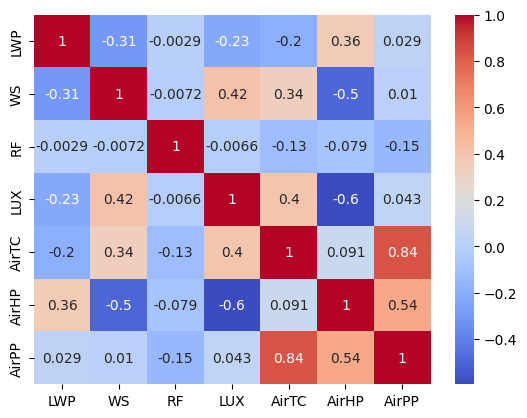

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
features=["AirHP","AirPP"]
X=df[features]
y=df.AirTC
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 42)

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=41)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

Mean Absolute Error: 1.771858


In [79]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))
    

Mean Absolute Error: 1.423362


In [80]:
from xgboost import XGBRegressor

model3= XGBRegressor(n_estimators=100, learning_rate=0.04)
model3.fit(train_X, train_y)
pred3=model3.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred3)))

Mean Absolute Error: 1.450746


In [81]:
pred2

array([34.957 , 29.9675, 26.8682, ..., 23.6188, 21.446 , 34.9944])

In [220]:
import pandas as pd

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
dates = pd.to_datetime(data['Date'])
temperatures = data['AirTC']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.20, random_state=42)



In [221]:
train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})


In [224]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=110, learning_rate=0.048)
model.fit(train_X, train_temperatures)
start_date = pd.to_datetime('2023-05-10')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_dates = pd.date_range(start=start_date + start_time, periods= 13, freq='D')

# Predict the temperatures for the next 15 days
#next_dates = pd.date_range(start=test_dates.iloc[-1], periods=90, freq='D')
next_X = pd.DataFrame({'Year': next_dates.year,
                       'Month': next_dates.month,
                       'Day': next_dates.day})
next_predictions = model.predict(next_X)


In [225]:
predictions_df = pd.DataFrame({'Date': next_dates, 'Temperature': next_predictions})
print(predictions_df)


         Date  Temperature
0  2023-05-10    32.961269
1  2023-05-11    30.215223
2  2023-05-12    32.534306
3  2023-05-13    33.055511
4  2023-05-14    31.683601
5  2023-05-15    33.934437
6  2023-05-16    34.393661
7  2023-05-17    33.514381
8  2023-05-18    32.383759
9  2023-05-19    32.116928
10 2023-05-20    32.118237
11 2023-05-21    31.832293
12 2023-05-22    31.557060


In [169]:
prediction = predictions_df.Temperature
prediction

0     31.912605
1     29.812214
2     31.980877
3     32.603916
4     30.965076
5     33.752808
6     33.727982
7     32.535358
8     32.135067
9     32.021366
10    32.021366
11    31.761606
12    31.140379
Name: Temperature, dtype: float32

In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
dates = pd.to_datetime(data['Date'])
temperatures = data['AirTC']

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.2, random_state=242)

train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})

# Create and train the XGBoost model with adjusted hyperparameters
model = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, subsample=0.8, colsample_bytree=0.8)
model.fit(train_X, train_temperatures)

# Predict the temperatures for the test set
test_predictions = model.predict(test_X)
print(test_predictions)
# Calculate the mean absolute


[27.779354 27.779354 27.881279 28.623955 28.082188 28.788671 28.148289
 27.881279 28.857883 28.857883 28.152637 28.857883 28.623955 27.13576
 27.536674 27.881279 28.082188 27.536674 28.082188 28.384344 28.788671
 28.082188 27.536674 27.779354 28.788671 28.152637 28.347254 28.152637
 28.384344 28.623955 28.857883 28.152637 28.148289 28.857883 27.536674
 28.082188 28.347254 28.351215 27.779354 28.347254 27.881279 28.384344
 27.779354 28.471022 28.351215 28.152637 28.384344 28.152637 28.384344
 28.347254 28.857883 28.082188 28.857883 28.857883 28.347254 28.347254
 28.082188 28.623955 27.779354 28.384344 27.536674 28.471022 28.152637
 27.881279 28.384344 28.788671 27.779354 27.881279 27.881279 28.471022
 28.857883 27.881279 27.881279 27.881279 28.347254 28.857883 28.152637
 28.351215 28.857883 28.082188 28.857883 27.779354 27.536674 28.082188
 28.148289 28.148289 28.471022 27.779354 28.347254 28.082188 28.788671
 28.082188 28.471022 28.857883 27.779354 28.347254 28.788671 28.148289
 28.788

In [149]:


# Calculate metrics for the test set
mse = mean_squared_error(test_temperatures, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_temperatures, test_predictions)

print("Test Set Metrics:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)
true_values = [32.556721,30.108000,32.350244,33.135962,31.629687,34.271231,34.526951, 33.335732,32.555301, 32.361548,32.480952,31.945833, 31.805357]
# Calculate metrics for the next 15 days (replace true_values with actual temperature values)
next_mse = mean_squared_error(true_values, next_predictions)
next_rmse = np.sqrt(next_mse)
next_r2 = r2_score(true_values, next_predictions)

print("Next 15 Days Metrics:")
print("MSE: ", next_mse)
print("RMSE: ", next_rmse)
print("R2 Score: ", next_r2)

Test Set Metrics:
MSE:  16.29503435221752
RMSE:  4.036710833366383
R2 Score:  0.07310677229558538
Next 15 Days Metrics:
MSE:  0.25567775522208
RMSE:  0.5056458792693559
R2 Score:  0.7874968503788408


In [150]:
start_date = pd.to_datetime('2023-05-22')
start_time = pd.to_timedelta('00 hours 00 minutes 00 seconds')
data['datetime'] = pd.to_datetime(data['Date'])
# Step 3: Calculate the number of minutes between the start date/time and the first prediction
minutes = (start_date - data['datetime'].min()).total_seconds() // 60

# Step 4: Generate next 30 days' datetime at hourly intervals starting from the specified date/time
next_30_days = pd.date_range(start=start_date + start_time, periods=24 * 30, freq='60T')

# Step 5: Extract hour and day for the next 30 days
next_hour = [dt.hour for dt in next_30_days]
next_day = [dt.day for dt in next_30_days]

# Step 6: Create DataFrame with predictions for the next 30 days
predictions = pd.DataFrame({'datetime': next_30_days})

# Step 7: Fill in temperature predictions based on average temperature at the corresponding hour
#predictions['temperature'] = [data[data['hour'] == hour]['AirTC'].mean()for hour in next_hour]
# Step 7: Fill in temperature predictions based on the average between maximum and mean temperature at the corresponding hour
predictions['temperature'] = [(data[data['hour'] == hour]['AirTC'].max() + data[data['hour'] == hour]['AirTC'].mean()) / 2 for hour in next_hour]
# Step 6: Create DataFrame with predictions for the next 30 days at 6-hour intervals
predictions = pd.DataFrame({'datetime': next_30_days[::6]})  # Only select every 4th datetime

# Step 7: Fill in temperature predictions based on the mean temperature for the corresponding 6-hour interval
predictions['temperature'] = [(data[(data['hour'] >= start_hour) & (data['hour'] < start_hour + 6)]['AirTC'].mean()) for start_hour in next_hour[::6]]  # Only select every 4th hour

print(predictions)



KeyError: ignored

In [86]:

data = pd.read_csv("/content/srm0002-wmu4g-_2_.csv")
data['Date'] = pd.to_datetime(data['Date'])
# Group the data by date and calculate the average value
daily_average = data.groupby(data['Date'].dt.date)['AirTC'].mean()

# Print the daily average values
print(daily_average)

Date
2023-05-10    32.556721
2023-05-11    30.108000
2023-05-12    32.350244
2023-05-13    33.135962
2023-05-14    31.629687
2023-05-15    34.271231
2023-05-16    34.526951
2023-05-17    33.335732
2023-05-18    32.555301
2023-05-19    32.361548
2023-05-20    32.480952
2023-05-21    31.945833
2023-05-22    31.805357
2023-05-23    30.902045
Name: AirTC, dtype: float64


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset into a DataFrame
# Assuming your dataset has 'Date' and 'Temperature' columns
dates = pd.to_datetime(data['Date'])
temperatures = data['AirTC']

# Split the data into training and testing sets
train_dates, test_dates, train_temperatures, test_temperatures = train_test_split(dates, temperatures, test_size=0.15, random_state=42)

train_X = pd.DataFrame({'Year': train_dates.dt.year,
                        'Month': train_dates.dt.month,
                        'Day': train_dates.dt.day})
test_X = pd.DataFrame({'Year': test_dates.dt.year,
                       'Month': test_dates.dt.month,
                       'Day': test_dates.dt.day})

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.04)
model.fit(train_X, train_temperatures)

# Predict the temperatures for the test set and next 15 days
test_predictions = model.predict(test_X)
next_predictions = model.predict(next_X)

# Calculate metrics for the test set
mse = mean_squared_error(test_temperatures, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_temperatures, test_predictions)

print("Test Set Metrics:")
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 Score: ", r2)
true values = []
# Calculate metrics for the next 15 days (replace true_values with actual temperature values)
next_mse = mean_squared_error(true_values, next_predictions)
next_rmse = np.sqrt(next_mse)
next_r2 = r2_score(true_values, next_predictions)

print("Next 15 Days Metrics:")
print("MSE: ", next_mse)
print("RMSE: ", next_rmse)
print("R2 Score: ", next_r2)


Test Set Metrics:
MSE:  16.29503435221752
RMSE:  4.036710833366383
R2 Score:  0.07310677229558538


NameError: ignored